## Clasificación desde Machine Learning

### Desafio 1:
- Importe los módulos básicos para el análisis de datos
- Importe seaborn.
- Importe statsmodels
- Importe LogisticRegression, train_test_split, StandardScaler, classification_report y roc_curve de sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn")

In [2]:
df = pd.read_csv("default_credit.csv").drop(columns="index")
df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


### Desafio 2:
- Explore las principales relaciones entre las variables. Utilizando los métodos boxplot y lmplot de seaborn implemente los siguientes gráficos.
    - Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.
    - Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.
    - Un boxplot del balance total de las cuentas, segmentado por el status de default.
    - Un boxplot del ingreso total de cada cliente, segmentado por el status de default.
    - Un diagrama de dispersión entre balance e income , segmentado por el status de estudiante.
    - Un diagrama de dispersión entre balance e income , segmentado por el status de default.
- Comente brevemente sobre los principales patrones de comportamiento.
- tip: Puede utilizar el argumento hue en lmplot para identificar las observaciones por status

In [3]:
def plot_boxplot(df, vble1, vble2):
    grid = sns.FacetGrid(df, col_wrap=2, col=vble1)
    grid.map(sns.boxplot, vble2 ,orient="v")
    plt.show()

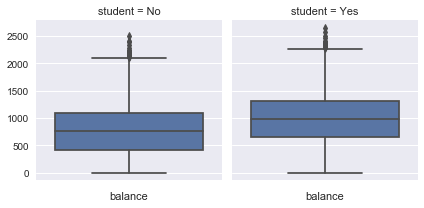

In [4]:
plot_boxplot(df,"student", "balance")

En principio podriamos decir que los no estudiantes tienen menor saldo en la cuenta de crédito.

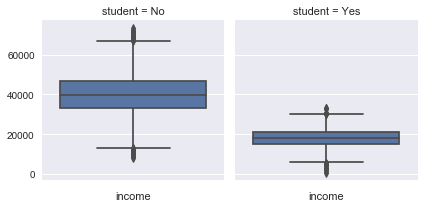

In [5]:
plot_boxplot(df,"student", "income")

Los estudiantes tienen menos ingresos declarados que los no estudiantes.

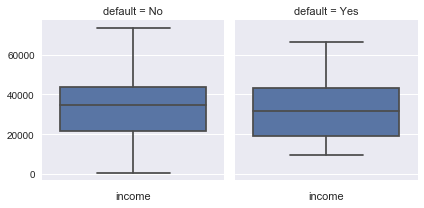

In [6]:
plot_boxplot(df,"default", "income")

Segun los datos no importa tu ingreso para ser moroso o no.

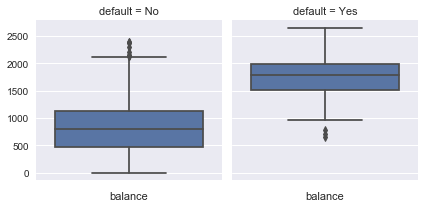

In [7]:
plot_boxplot(df,"default", "balance")

Los que caen en default son los que poseen mayor saldo en la cuenta de crédito.

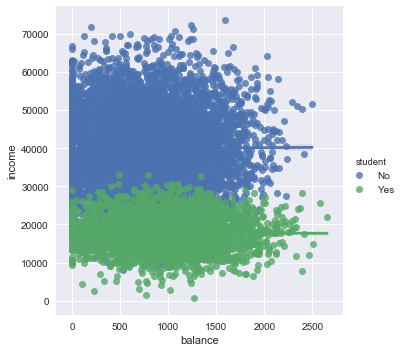

In [8]:
sns.lmplot("balance", "income" ,data=df , hue = "student")

Podemos reafirmar lo que vimos anteriormente de que los que son estudiantes poseen un menor ingreso que los no estudiantes. 

El saldo en la cuenta de crédito no parece tener grandes diferencias si hablamos de una población de estudiantes con una que no lo es.

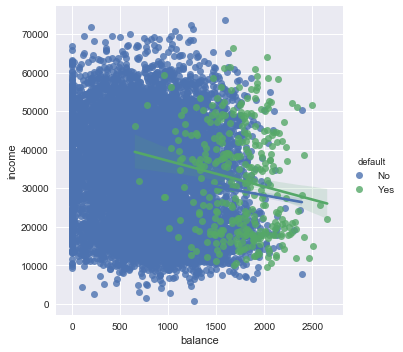

In [9]:
sns.lmplot("balance", "income" ,data=df , hue = "default")

Del gráfico anterior podemos concluir que el nivel de ingreso no genera una diferencia para caer o no en default. 

No asi es el caso del saldo en la cuenta de crédito en donde se observa que a mayor saldo mayor es relacion con caer en default.

### Desafio 3:
- Recodifique las variables student y default para que adquieran atributos numéricos.
- Implemente el siguiente modelo econométrico:
$$log \left( \frac{Pr(default = 1)}{1 - Pr(default = 1)} \right) = \beta_0 + \beta_1 balance + \beta_2 income + \beta_3 student$$
- A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.


In [10]:
df["default"] = np.where(df["default"] == "Yes", 1, 0)
df["student"] = np.where(df["student"] == "Yes", 1, 0)

In [11]:
model = smf.logit("default ~ student + balance + income", df).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [12]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: default          AIC:              1579.5448  
Date:               2020-12-06 14:06 BIC:              1608.3862  
No. Observations:   10000            Log-Likelihood:   -785.77    
Df Model:           3                LL-Null:          -1460.3    
Df Residuals:       9996             LLR p-value:      3.2575e-292
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|    [0.025    0.975]
-------------------------------------------------------------------
Intercept   -10.8690    0.4923  -22.0793  0.0000  -11.8339  -9.9042
student      -0.6468    0.2363   -2.7376  0.0062   -1.1098  -0.1837
balance       0.0057    0.0002   24.7365  0.0000    0.0053   0.0062
income        0.0000    0.0000    0.3698  0.7115   -0.0000   0.0000
==================================================================

"""

In [13]:
logit_depurado = smf.logit("default ~ student + balance", df).fit()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


In [14]:
logit_depurado.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: default          AIC:              1577.6816  
Date:               2020-12-06 14:06 BIC:              1599.3126  
No. Observations:   10000            Log-Likelihood:   -785.84    
Df Model:           2                LL-Null:          -1460.3    
Df Residuals:       9997             LLR p-value:      1.1893e-293
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
            Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept  -10.7495    0.3692  -29.1149  0.0000  -11.4731  -10.0259
student     -0.7149    0.1475   -4.8459  0.0000   -1.0040   -0.4257
balance      0.0057    0.0002   24.7485  0.0000    0.0053    0.0062
==================================================================

"""

La variable default está impactada inversamente con la variables estudiante y positivamente por la variable balance

### Desafio 4:
- A partir del modelo depurado, genere un modelo predictivo con las siguientes características:
Estandarize la matriz de atributos.
- Genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el
conjunto de validación.
- Implemente el modelo sin alterar los hiperparámetros.
- Genere la predicción de las clases y de la probabilidad.
- Reporte las métricas de precision, recall y f1 para ambas clases.
- Grafique la curva Receiver Operator Characteristic.
- En base a los pasos, comente sobre el desempeño predictivo del modelo.

In [15]:
data = StandardScaler().fit_transform(df.drop(columns=['income','default']))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data,df["default"] ,test_size=.33, random_state= 2054)


In [17]:
# Prestar atencion a esto porque es con el que se hace tunning
logistic_reg = LogisticRegression().fit(X_train,y_train)
logistic_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# Predicción
y_hat = logistic_reg.predict(X_test)
y_hat

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
# Me otorga las probabilidades de que sea uno. 
# Si el y_hat_proba me da por encima de .5,el y_hat va a ser un 1. De lo contrario va a ser un 0.
y_hat_proba = logistic_reg.predict_proba(X_test)
y_hat_proba

array([[9.08720417e-01, 9.12795827e-02],
       [9.99551617e-01, 4.48383305e-04],
       [9.99935702e-01, 6.42984627e-05],
       ...,
       [9.99939324e-01, 6.06759972e-05],
       [9.99446098e-01, 5.53902240e-04],
       [9.94693147e-01, 5.30685330e-03]])

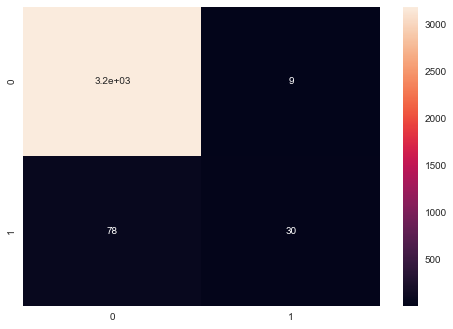

In [20]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot = True)

In [21]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3192
           1       0.77      0.28      0.41       108

    accuracy                           0.97      3300
   macro avg       0.87      0.64      0.70      3300
weighted avg       0.97      0.97      0.97      3300



La precision en 0 es muy buena pero nuestro set de datos tenia gran cantidad de ceros. En el caso del 1 tambies es una precision buena.

No asi el caso del recall que nos da bastante bajo al ser de 0.36, es decir, el cociente entre lo que dijo que era positivo y efectivamente lo fueron sobre la totalidad de casos positivos es baja.

In [22]:
# Me quedo con la probabilidad de que sea uno
y_hat_proba = y_hat_proba[:,1]

In [23]:
false_positive, true_positive, _= roc_curve(y_test, y_hat_proba)

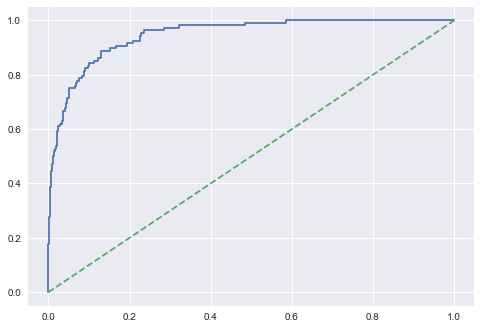

In [24]:
plt.plot(false_positive, true_positive)
plt.plot([0,1], ls="--")

La curva ROC representa un cociente de los unos sobre los ceros. Compara entre  los verdaderos positivos y los falsos positivos.

Se ve un gráfico alejado de la media. Es una buena estimacion, una buena clasificación. Corresponde con lo que vimos anteriormente de la buena precisión.

Hay que tener en cuenta que este modelo esta desbalanceado. Existen muchos ceros comparado con la cantidad de unos.